# 1) Problem Statement:
- Myntra is a leading Indian fashion e-commerce company known for its wide range of clothing,
accessories, and lifestyle products.
-  While Myntra is recognized primarily for fashion, this dataset
relates to the company&#39;s online retail operations for Myntra Gifts Ltd., a UK-based division
specializing in unique all-occasion giftware.
- This dataset spans transactions from December 1, 2009,
to December 9, 2011, and includes detailed records of sales made through Myntra Gifts Ltd.’s non-
store online platform.
- The dataset provides a thorough snapshot of the company&#39;s international
online retail activities during this period.
- The primary purpose of analyzing this dataset is to extract valuable
  insights to enhance Myntra Gifts Ltd.'s business strategies.
Specific goals include:
  1. Identifying Purchasing Trends
  2. Evaluating Product Performance
  3. Understanding Customer Behavior
  4. Optimizing Pricing Strategies



# 2) Data Collection:
- Dataset Source -https://docs.google.com/spreadsheets/d/1_W3Jfp1bTWpPFmqyGgGXYJGd0rHIV8dD/edit?amp%3Bouid=111221163617964625375&amp%3Brtpof=true&amp%3Bsd=true&gid=501524341#gid=501524341
- This Data consist of 8 columns and 541910 columns.





## 2.1 Import Data and Required Packages:
- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
!pip install fireducks
import fireducks.pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the Excel Data as Pandas DataFrame


In [2]:
!pip install openpyxl
df1 = pd.read_excel('Online Retail.xlsx',dtype={'InvoiceNo':'string','StockCode':'string','Description':'string','Country':'string'})

Show Top 5 Records

In [3]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Shape of the dataset

In [4]:
df1.shape

(541909, 8)

Show Datatypes

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


2.2 **Dataset information:**
- InvoiceNo: It represents unique identifier assigned to each invoice in a transction.
- StockCode: Unique value to represent each stock.
- Description: Provide Brief description about the stock.
- Quantity: Number of items purchased per transaction
- InvoiceDate: Refers to the date and time when an invoice was generated for a transaction.
- UnitPrice: Price per item
- CustomerID: Unique Customer ID
- Country: Represnts Geographical country






# 3. **Data Checks to perform:**
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of
  each column
- Check statistics of data set
- Check various categories present in  
  the different categorical column

## 3.1 **Check Missing Values:**


In [6]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


* The Description and CustomerID colun contains Missing values.
Therefore we need to remove this missing values using various Imputation technique.


### Finding the most frequently occuring value in the Description Column.


In [7]:
df1[df1.StockCode=="22139"].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


### Grouping the most_frequently occuring based on StockCode


In [8]:
most_freq=df1[['StockCode','Description']].value_counts().reset_index()
most_freq[most_freq.StockCode=="85123A"].head(1)
most_freq=most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4767,35600A,Found by jackie,1
4769,35597B,BLACKCHRISTMAS TREE 30CM,1
4770,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4777,37330,BIG POLKADOT MUG,1


### Replacing the missing value in Description with  most frequently occuring values.


In [9]:
most_freq.columns=['StockCode','freq_Description','count']
df2=df1.merge(most_freq,on='StockCode',how='left')
df2['Description'] = df2['freq_Description']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


### Again Checking the null values

In [10]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
freq_Description,112
count,112


### Drop the extra 'freq_description' & 'Count' columns.


In [11]:
df2.drop(columns=['freq_Description','count'],inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Droping the Remainig Null Values from the "Description" Column.


In [12]:
df2.dropna(subset=['Description'],inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


### Removing the negative values in UnitPrice Columns and creating an another Dataframe.


In [13]:
df2[df2.UnitPrice<0]
df3=df2[(df2.UnitPrice>0) & (df2.Quantity>0)]
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


### Removing the missing values from CustomerID


In [14]:
df3.dropna(subset=['CustomerID'],inplace=True)
df3.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## 3.2 **Check Duplicates:**

In [15]:
df3.duplicated().sum()

5194

- Here 6763 duplicated values implies that there are many transaction for a particular Invoice Date and hence we cannot remove these values for performing customer segmentation



## 3.3 **Check data types:**

In [16]:
# Check Null and Dtypes
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  string        
 1   StockCode    397884 non-null  string        
 2   Description  397884 non-null  string        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 27.3 MB


### Converting the CustomerID Datatype

In [17]:
df3['CustomerID']=df3['CustomerID'].astype(float)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  string        
 1   StockCode    397884 non-null  string        
 2   Description  397884 non-null  string        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 27.3 MB


## 3.4 **Checking the number of unique values of each column:**


In [18]:
df3.nunique()

,0
InvoiceNo,18532
StockCode,3665
Description,3646
Quantity,301
InvoiceDate,17282
UnitPrice,440
CustomerID,4338
Country,37


## 3.5 **Check statistics of Numerical dataset:**


In [19]:
df3.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


### **Insight:**
- Transactions are evenly spread throughout  the year with no missing dates.
- The presence of a very high max value (80,
995) suggests the possibility of bulk purchases or data errors.
- The data spans from Dec 2010 to Dec 2011,
covering approximately one year.
- The number of unique customers (527,365)
suggests multiple purchases per customer, which could be useful for customer segmentation and loyalty analysis.

## 3.6 **Check statistics of Categorical dataset:**

In [20]:
df3.describe(include='string')


,InvoiceNo,StockCode,Description,Country
count,397884,397884,397884,397884
unique,18532,3665,3646,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2035,2035,354321


### **Insight:**
- Some invoices appear multiple times, indicating bulk purchases or multiple items per invoice.
- Certain products (like 85123A) are best-sellers or frequently restocked.
- UK dominates sales (89% of total transactions), meaning most customers are local.
- International sales are relatively low, so expanding to other markets might be a growth opportunity.

## 3.7 **Exploring Data:**


In [21]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [22]:
# define numerical & categorical columns
numeric_features = [feature for feature in df3.columns if df3[feature].dtype != 'string']
categorical_features = [feature for feature in df3.columns if df3[feature].dtype == 'string']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

We have 4 categorical features : ['InvoiceNo', 'StockCode', 'Description', 'Country']


# 4) **Feature Engineering: Create New Columns:**


## 4.1) Creating an Total Sales Quantity Column


In [23]:
# Creating a Copy of dataframe
df4=df3.copy()
df4['Total_Sales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  string        
 1   StockCode    397884 non-null  string        
 2   Description  397884 non-null  string        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  string        
 8   Total_Sales  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), string(4)
memory usage: 30.4 MB


In [25]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## 4.2) Creating an Month columns to perform Monthly Trend Analysis.



In [26]:
df4['Month']=df4['InvoiceDate'].dt.month
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12


## 4.3) Creating an Weekday columns to perform Weekly Trend Analysis.


In [27]:
df4['Weekday']=df4['InvoiceDate'].dt.weekday
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2


## 4.4) Creating an Quarterly columns to perform Quarterly Trend Analysis.


In [28]:
df4['Quarter']=df4['InvoiceDate'].dt.quarter
df4.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month,Weekday,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2,4


In [29]:
# Fetching Country with maximum ('Quantity','UnitPtice','Total_Sales') values.
max_qty_country = df4.loc[df4['Quantity'].idxmax(),'Country']
max_UnitPrice_country=df4.loc[df4['UnitPrice'].idxmax(),'Country']
max_Total_Sales_country=df4.loc[df4['Total_Sales'].idxmax(),'Country']


print(f'Country with maximum Stock Quantity : {max_qty_country}')
print(f'Country having maximum Stock UnitPrice : {max_UnitPrice_country}')
print(f'Country with maximum Total_Sales : {max_Total_Sales_country}')

Country with maximum Stock Quantity : United Kingdom
Country having maximum Stock UnitPrice : United Kingdom
Country with maximum Total_Sales : United Kingdom


# 5.) **Exploring Data(Visualization)**

## 5.1) Visualizing Total Sales Over Month

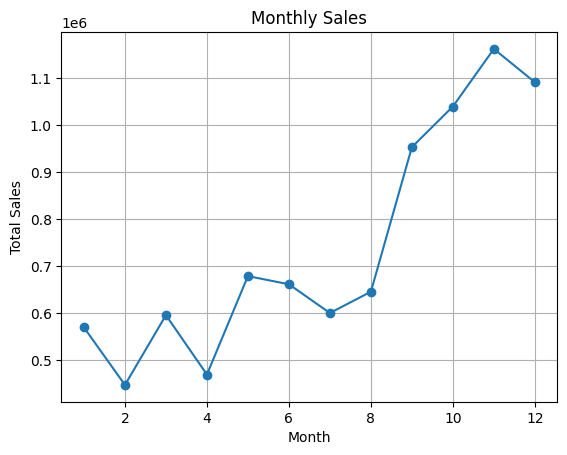

In [30]:
monthly_sales=df4.groupby('Month')['Total_Sales'].sum()
monthly_sales.plot(kind='line',title='Monthly Sales',marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

**Insigths:**

Total sales started rising up in August havng a peek in Novemember.This likely due to the holiday season at the end of the year.

## 5.2) Visualizing the Total Sales Over Weekdays And Quarter:

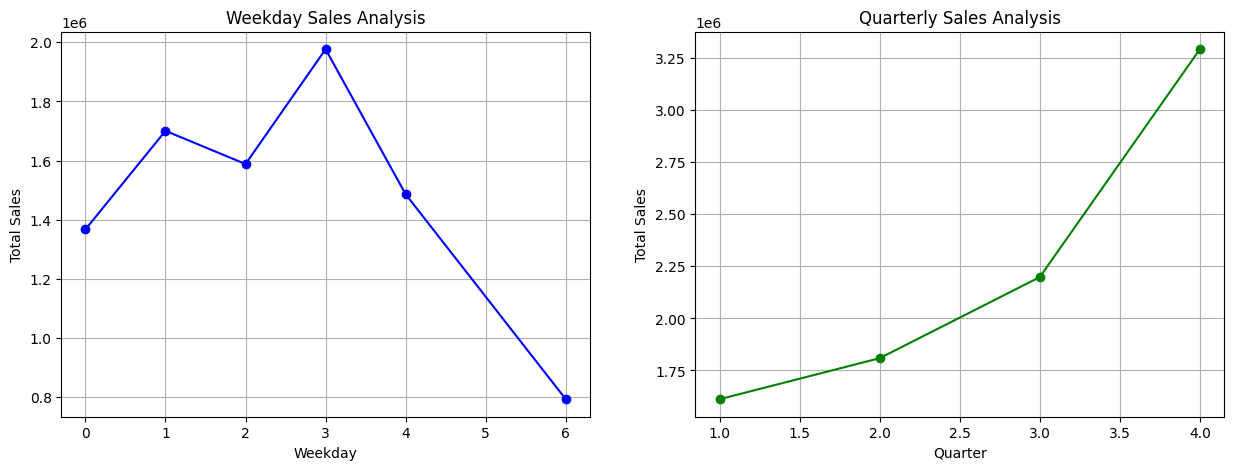

In [31]:
fig,axs=plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
weekly_sales=df4.groupby('Weekday')['Total_Sales'].sum()
weekly_sales.plot(kind='line',title='Weekday Sales Analysis',marker='o',ax=axs[0],color='b')
axs[0].set_xlabel('Weekday')
axs[0].set_ylabel('Total Sales')
axs[0].grid()

plt.subplot(122)
plt.plot(df4.groupby('Quarter')['Total_Sales'].sum(),marker='o',color='g')
plt.title('Quarterly Sales Analysis')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid()

**Insights:**
- Sales Peaks:
     The highest sales occur around the middle of the weekdays(between days Tuesday and Wednesday).
- Sales Decline:
     There is a noticeable decrease in sales towards the end of the week (particularly from days Thursday to Sunday).
- The growth between quarters is consistent, with a significant jump from Quarter 3 to Quarter 4. This could suggest effective strategies implemented in the final quarter.

## 5.3 ) **Top 5 Countries By Total Sales**


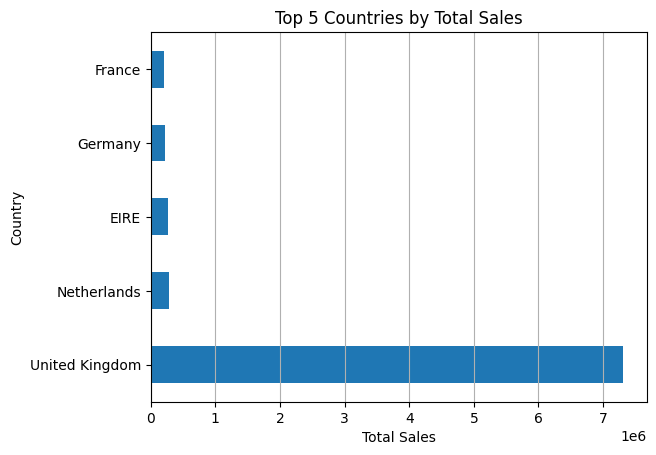

United Kingdom: 7308391.5540000005
Netherlands: 285446.34
EIRE: 265545.9
Germany: 228867.14
France: 209024.05


In [32]:
import matplotlib.pyplot as plt
top_5_countries = df4.groupby('Country')['Total_Sales'].sum().sort_values(ascending=False).head(5)
top_5_countries.plot(kind='barh', title='Top 5 Countries by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

for country,total_sales in top_5_countries.items():
    print(f'{country}: {total_sales}')

## 5.4) **Visualizing Total Sales by Pct Contribution**

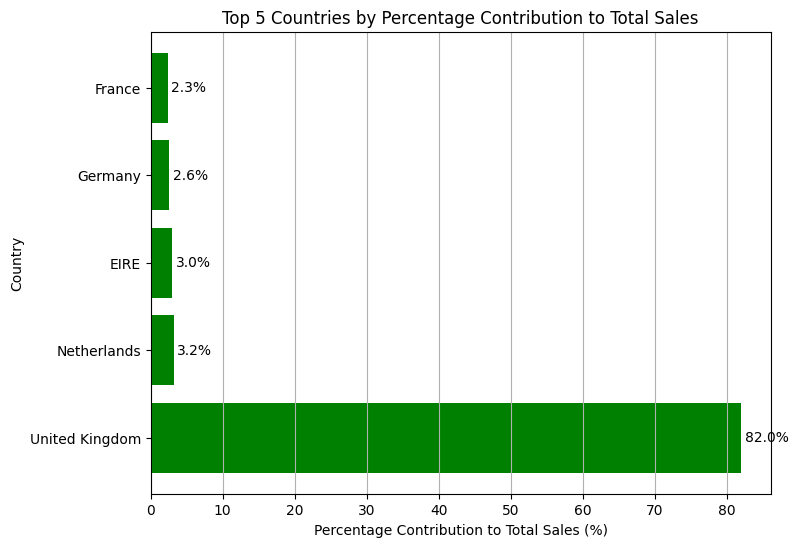

In [33]:

country_wise_sales=df4.groupby('Country')['Total_Sales'].sum()
total_sales=country_wise_sales.sum()

top_5_countries = country_wise_sales.sort_values(ascending=False).head(5)
percentage_contributions=(top_5_countries/total_sales)*100

plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
bars = plt.barh(percentage_contributions.index, percentage_contributions.values,color='g')
plt.xlabel('Percentage Contribution to Total Sales (%)')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.grid(axis='x')


# Add percentage labels to the bars
for bar, percentage in zip(bars, percentage_contributions):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
             va='center', ha='left', fontsize=10, color='black')


**Insights:**
- We can see that  United Kingdom has the highest contribution of 82.0% in Overall Sales.



## 5.5) **Product-Wise Sales Analysis**


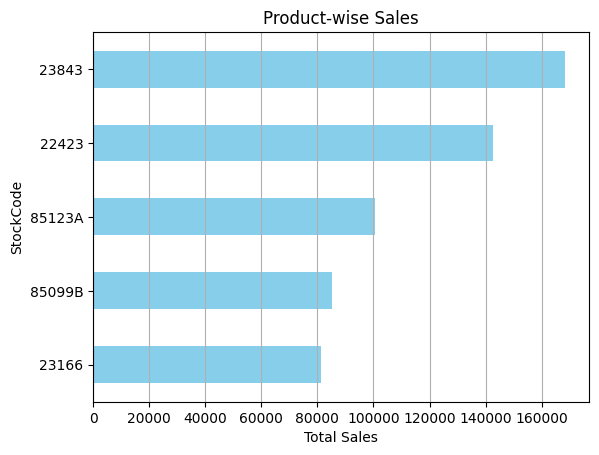

Text(0.5, 1.0, 'Stock-wise Sales Distribution')

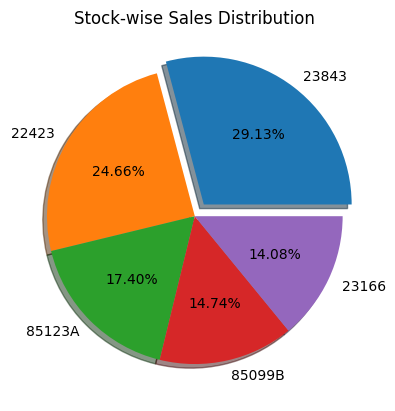

In [34]:
figsize=(12,5)
product_wise_sales=df4.groupby('StockCode')['Total_Sales'].sum()
total_sales=product_wise_sales.sum()
product_wise_sales
top_5_products=product_wise_sales.sort_values(ascending=False).head(5)
top_5_products.plot(kind='barh',color='skyblue')
plt.title('Product-wise Sales')
plt.xlabel('Total Sales')
plt.ylabel('StockCode')
plt.grid(axis='x')
plt.gca().invert_yaxis()  # To show the highest sales at the top
plt.show()

percentage_contributions=(top_5_products/total_sales)*100
plt.pie(x=percentage_contributions,labels=top_5_products.index,autopct='%1.2f%%',explode=[0.1,0,0,0,0],shadow=True)
plt.title('Stock-wise Sales Distribution')

# 6) **Feature Wise Visualization**

## 6.1) **UnitPrice Column**
- How is the Avg UnitPrice Distribution of each Stock Over Countries



**UNIVARIATE ANALYSIS ( How is distribution of UnitPrice? )**


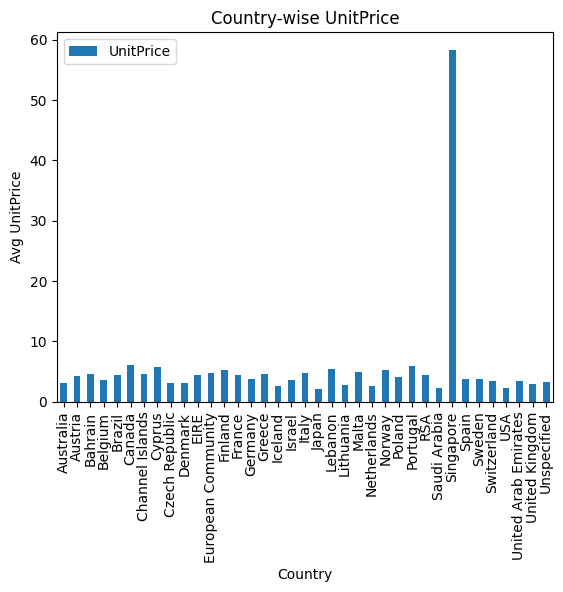

In [35]:
figsize=(20,5)
country_wise_unitprice=df4.groupby('Country').agg({'UnitPrice':'mean'})
country_wise_unitprice.plot(kind='bar',title='Country-wise UnitPrice')
plt.xlabel('Country')
plt.ylabel('Avg UnitPrice')
plt.show()

## 6.2) **Total Sales Column:**
- How Distribution Of Sales per Hour
- Is there any Correlation b/w UnitPrice And Quantity


### Distribution Of Sales Per Hour

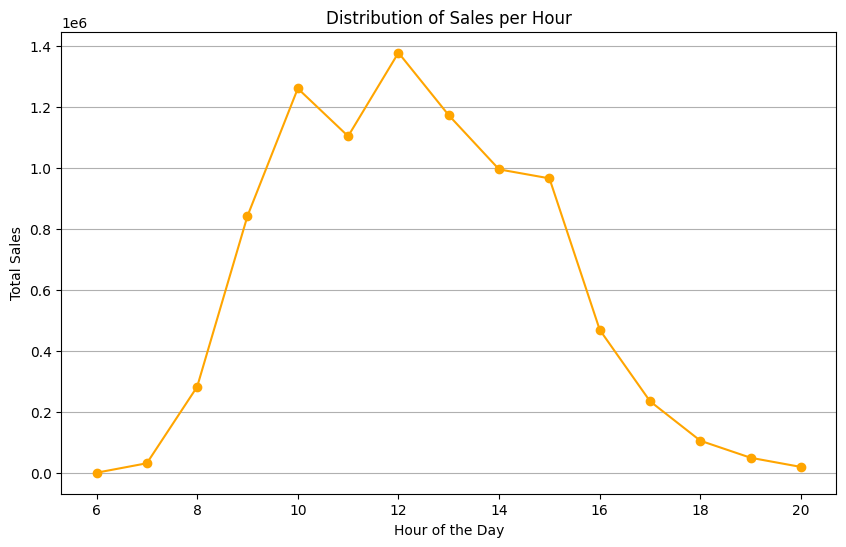

In [36]:
df4['Hour'] = df4['InvoiceDate'].dt.hour
hourly_sales = df4.groupby('Hour')['Total_Sales'].sum()
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', color='orange',marker='o')
plt.title('Distribution of Sales per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y')
plt.show()

# Impact of UnitPrice On Total_Sales

The correlation between UnitPrice and Total Sales is: 0.082


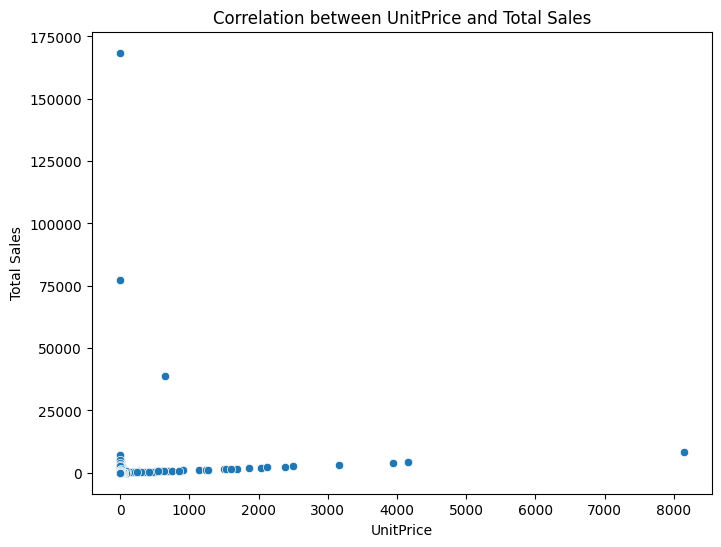

In [37]:
correlation = df4['UnitPrice'].corr(df4['Total_Sales'])
print(f"The correlation between UnitPrice and Total Sales is: {round(correlation,3)}")

# Visualization of the correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df4['UnitPrice'], y=df4['Total_Sales'], data=df4)
plt.title('Correlation between UnitPrice and Total Sales')
plt.xlabel('UnitPrice')
plt.ylabel('Total Sales')
plt.show()


# 7)  RFM Analysis

In [38]:
# Customer last transaction date
refrence_date=df4['InvoiceDate'].max()

# group by CustomerID to calculate R,F,and M
rfm=df4.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(refrence_date-x.max()).days,
    'InvoiceNo':'count',
    'Total_Sales':'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total_Sales': 'Monetary'})

## 7.1) Top 5 Customer Interms Of Receny,Frequency,Monetary

In [39]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


## 7.2) Assigning RFM Scores


In [40]:
# We rank customers into segments based on percentiles (1–4 scale) where 1=(worst),4=(best).

# creating quantiles for each RFM  segments
rfm['R_segment']=pd.qcut(rfm['Recency'],q=4,labels=[4,3,2,1])
rfm['F_segment']=pd.qcut(rfm['Frequency'],q=4,labels=[1,2,3,4])
rfm['M_segment']=pd.qcut(rfm['Monetary'],q=4,labels=[1,2,3,4])

# calculate the RFM_score = R_Segment + F_Segment + M_Segment
rfm['RFM_score']=rfm[['R_segment','F_segment','M_segment']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,6
12347.0,1,182,4310.00,4,4,4,12
12348.0,74,31,1797.24,2,2,4,8
12349.0,18,73,1757.55,3,3,4,10
12350.0,309,17,334.40,1,1,2,4


## 7.3) Performing Customer Segmentation Based on RFM Score

In [41]:
# Performing Customer Segementation by defining Cutomer Segments based on RFM scores.

def segment_customer(rfm):
    score = int(rfm)
    if score >= 12: return "Best Customers"
    elif score >= 10: return "Loyal Customers"
    elif score >= 6: return "Potential Loyalists"
    elif score >= 3: return "Need Attention"
    else: return "Lost Customers"

rfm['Segment']=rfm['RFM_score'].apply(segment_customer)
rfm.head()

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,6,Potential Loyalists
12347.0,1,182,4310.00,4,4,4,12,Best Customers
12348.0,74,31,1797.24,2,2,4,8,Potential Loyalists
12349.0,18,73,1757.55,3,3,4,10,Loyal Customers
12350.0,309,17,334.40,1,1,2,4,Need Attention


In [42]:
rfm['RFM_score'].value_counts()

,count
RFM_score,
5,516
6,460
7,459
8,454
12,447
10,426
9,417
11,392
3,385


Insights:
- The highest count is for RFM score 5 with 516 customers, suggesting this group is relatively active and engaged.
- The lowest representation is seen in RFM scores 3 and 4 with 385 and 382 customers, respectively, indicating these groups may be less engaged or valuable.
- There is a general decline in the number of customers as the RFM score increases past 5. This suggests that the majority of customers are clustered around the lower RFM score, with fewer highly engaged customers.


## 7.4) Dividing the Customers Segments Into Groups Based on RFM Score

In [43]:
# Performing Customer Segementation by defining Cutomer Segments based on RFM scores.
def segment_customer(rfm):
    score = int(rfm)
    if score >= 12: return "Best Customers"
    elif score >= 10: return "Loyal Customers"
    elif score >= 6: return "Potential Loyalists"
    elif score >= 3: return "Need Attention"
    else: return "Lost Customers"

rfm['Segment']=rfm['RFM_score'].apply(segment_customer)
rfm.head()

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,6,Potential Loyalists
12347.0,1,182,4310.00,4,4,4,12,Best Customers
12348.0,74,31,1797.24,2,2,4,8,Potential Loyalists
12349.0,18,73,1757.55,3,3,4,10,Loyal Customers
12350.0,309,17,334.40,1,1,2,4,Need Attention


## 7.5) Visualising the RFM Customer Segments

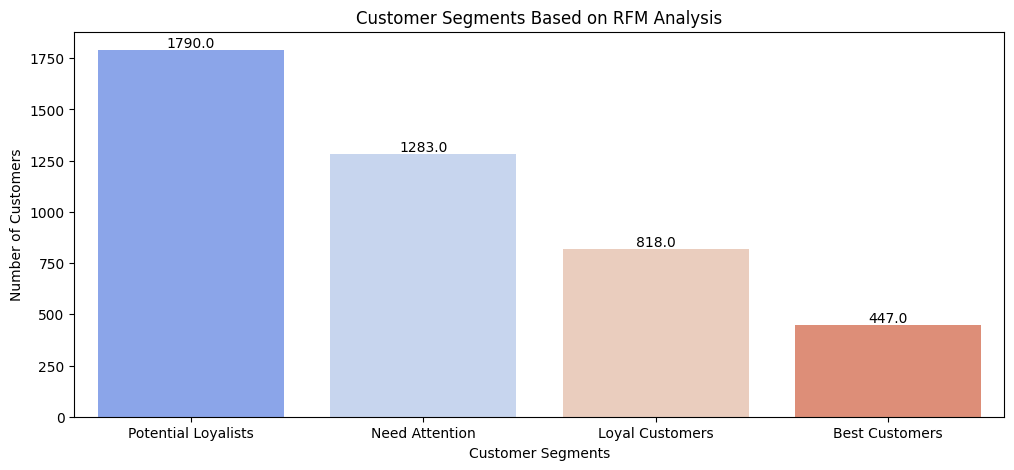

In [44]:
plt.figure(figsize=(12,5))
sns.countplot(data=rfm,x='Segment',order=rfm['Segment'].value_counts().index,palette='coolwarm')
plt.title('Customer Segments Based on RFM Analysis')
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

Insights:
- Customer Segment Distribution:
- The graph categorizes customers into
  four segments:
  1. Potential Loyalists
  2. Need Attention
  3. Loyal Customers
  4. Best Customers
- The high number of potential loyalists (1,790) indicates significant room for growth if the right strategies are implemented.
- With nearly 1,283 customers needing attention, there is a vital opportunity to re-engage these customers through targeted marketing efforts.
- While fewer in number, loyal customers (818) and best customers (447) should be prioritized for building a sustainable and profitable customer relationship.

# 8.) **Customer Segementation Using K-Means Clustering**


## 8.1) Normalization of RFM  Values

In [45]:
# Normalization of RFM  Values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])
rfm_scaled

array([[ 2.33457414e+00, -3.96577702e-01,  8.35866818e+00],
       [-9.05340320e-01,  3.94648958e-01,  2.50966264e-01],
       [-1.75359593e-01, -2.65435162e-01, -2.85960063e-02],
       ...,
       [-8.45341904e-01, -3.48492104e-01, -2.08742313e-01],
       [-8.85340848e-01,  2.90384290e+00,  4.51854273e-03],
       [-4.95351144e-01, -9.49498596e-02, -2.41412739e-02]])

In [46]:
# Converting rfm_scaled to Data frame
rfm_scaled=pd.DataFrame(rfm_scaled,columns=['Recency','Frequency','Monetary'])

## 8.2) Implementing Elbow Method

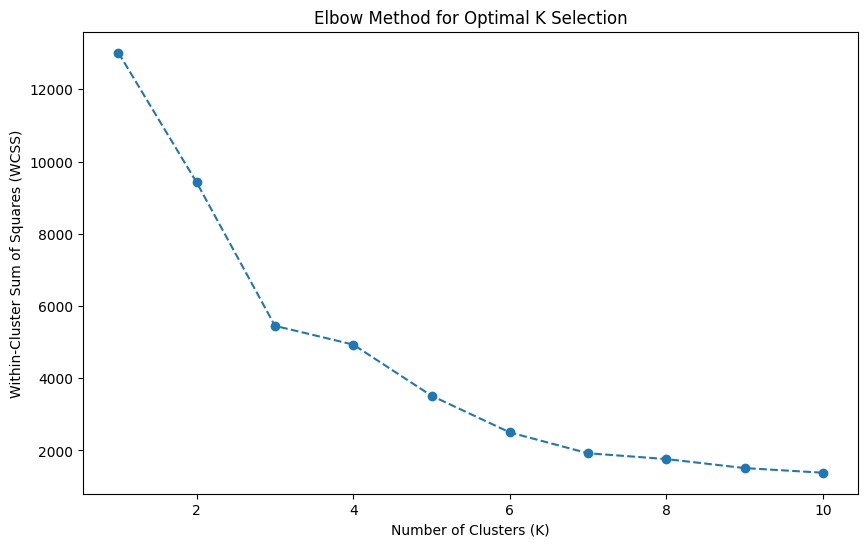

In [47]:
# Finding Optimal K-usingthe Elbow Method

# Within-Cluster Sum of Squares
wcss=[]

for k in range (1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(rfm_scaled)
  wcss.append(kmeans.inertia_)

# Plotting the the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.title('Elbow Method for Optimal K Selection')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

- From the Above Figure we can conclude that the Elbow point to be 4 becuase  this is where the rate of decrease in WCSS starts to slow down significantly.

## 8.3) Applying the K-Means Clustering

In [48]:
# Apply the K-Means Clustering with Optimal elbow point k=4
kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
rfm['Cluster']=kmeans.fit_predict(rfm_scaled)

In [49]:
# Now checking the Cluster Disrtibution
rfm['Cluster'].value_counts()

,count
Cluster,
0,3248
2,1080
3,6
1,4


## 8.4) Visualizing the Customer Segments

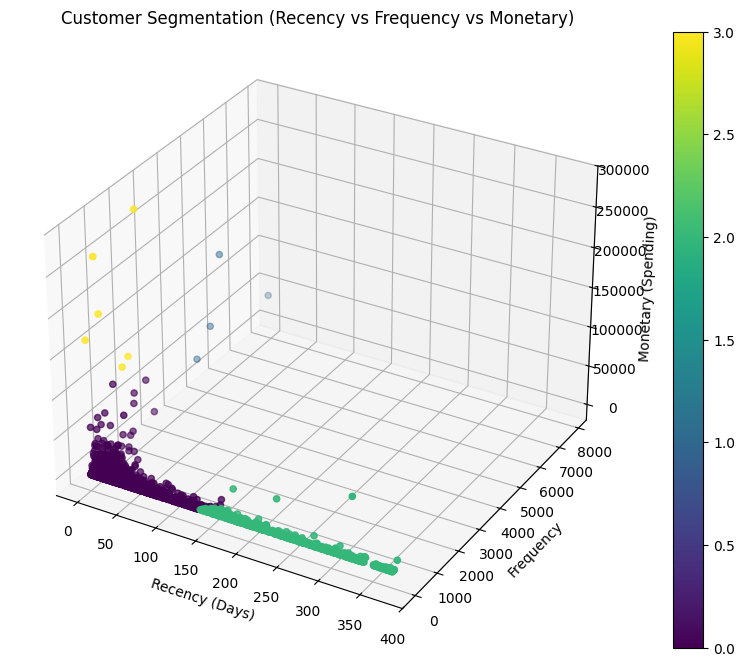

In [50]:
# Visualizing the clusters using a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for data points
scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='viridis')

ax.set_xlabel('Recency (Days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary (Spending)')
ax.set_title('Customer Segmentation (Recency vs Frequency vs Monetary)')

# Adding a colorbar to show the cluster assignments
plt.colorbar(scatter)
plt.legend
plt.show()

## **Cluster Insights**:
1.  **Cluster 0 (Purple)-Loyal Customers**:
    *   High monetary spending.
    *   Low recency (recent purchases).
    *   These customers are likely to return consistently and make frequent purchases.

2.  **Cluster 1 (Blue) - Potential Customers**:
    *   Moderate monetary spending.
    *   Moderate to low recency.
    *   These customers show potential for becoming loyal but need encouragement (e.g., targeted marketing).

3.  **Cluster 2 (Green) - Lost Customers:**
    *  Low monetary spending.
    *  High recency (long time since last purchase).
    *  These customers may have been
        active previously but have not engaged recently.

4.   **Cluster 3 (Yellow) - New or Inactive Customer:**
    *  Very low spending.
    *  High recency (recent engagement but low spending).
    *  Potentially new customers who have yet to make a significant purchase.

## 8.5) Evaluate Clustering Performance

In [51]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(rfm_scaled, rfm["Cluster"])
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.600


# 9) **Fine Tuning the K_Means Clustering Model**

In [52]:
rfm.isnull().sum()

,0
Recency,0
Frequency,0
Monetary,0
R_segment,0
F_segment,0
M_segment,0
RFM_score,0
Segment,0
Cluster,0


## 9.1) Checking For Outliers

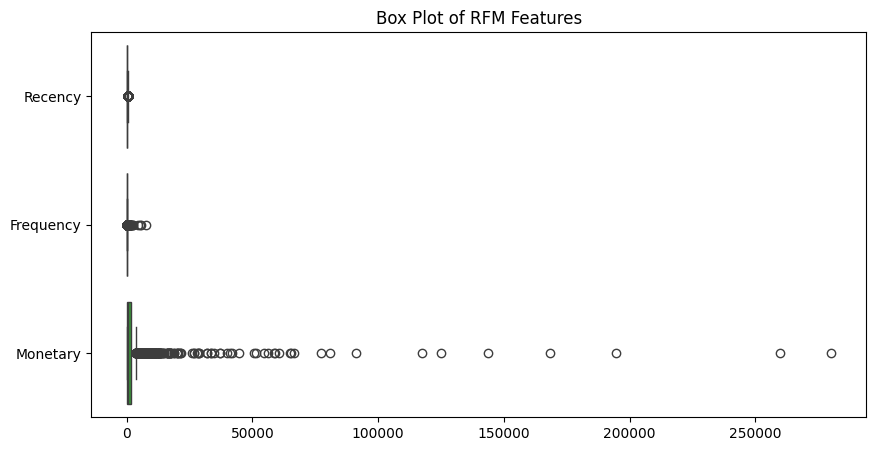

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(data=rfm[['Recency','Frequency','Monetary']],orient="h")
plt.title("Box Plot of RFM Features")
plt.show()

- There are outliers present in the Monetary Column Of RFM Features.

### 9.1.1) Removing the Outliers (IQR Method)


In [54]:
rfm.shape
rfm.dtypes


,0
Recency,int64
Frequency,int64
Monetary,float64
R_segment,category
F_segment,category
M_segment,category
RFM_score,int64
Segment,object
Cluster,int32


In [55]:
rfm['Monetary']=rfm['Monetary'].astype(int)

In [56]:
rfm.dtypes

,0
Recency,int64
Frequency,int64
Monetary,int64
R_segment,category
F_segment,category
M_segment,category
RFM_score,int64
Segment,object
Cluster,int32


In [57]:
rfm.shape

(4338, 9)

In [58]:
# Removing Extreme Outliers using IQR Method.

# Fetchinf all the numeric Column from RFM
rfm_numeric=rfm[['Recency','Frequency','Monetary']]

# Determinig the Inter Quartile Range
Q1=rfm_numeric.quantile(0.25)
Q3 = rfm_numeric.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
rfm_cleaned = rfm_numeric[~((rfm_numeric < lower_bound) | (rfm_numeric > upper_bound))]
print("Data shape after removing outliers:", rfm_cleaned.shape)

Data shape after removing outliers: (4338, 3)


## 9.2) Improve Feature Engineering

In [59]:
rfm_cleaned["Recency"] = np.log1p(rfm_cleaned["Recency"])
rfm_cleaned["Frequency"] = np.log1p(rfm_cleaned["Frequency"])
rfm_cleaned["Monetary"] = np.log1p(rfm_cleaned["Monetary"])


- Here we apply log transformation to rfm_cleaned Dataset in order to Reduce Skewness and Make clustering More effective

In [60]:
rfm_cleaned.isnull().sum()

,0
Recency,155
Frequency,380
Monetary,427


- Since There are Null Values Present in each column of the rfm_cleaned dataset.Therefore We need to replace these null Values with the mean value.

In [61]:
# Filling the missing values with Average Value.
rfm_cleaned = rfm_cleaned.fillna(rfm_cleaned.mean())

## 9.3) Applying Different Distance Metrics


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Compute pairwise Manhattan (L1) distances
X_manhattan = pairwise_distances(rfm_cleaned, metric='manhattan')

optimal_k = 4 # Adjust based on elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm_cleaned["Cluster"] = kmeans.fit_predict(X_manhattan)


## 9.4) Optimizing Cluster Number (K)
  


### 9.4.1) Applying Silhouette Score & Davies-Bouldin Score.

In [63]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_scores = []
davies_bouldin_scores = []


for k in range(2, 11):  # Testing K from 2 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(rfm_cleaned)

    silhouette_scores.append(silhouette_score(rfm_cleaned, labels))
    davies_bouldin_scores.append(davies_bouldin_score(rfm_cleaned, labels))

## 9.5) Plotting The **Silhouette Score** and **Davies-Bouldin Score**

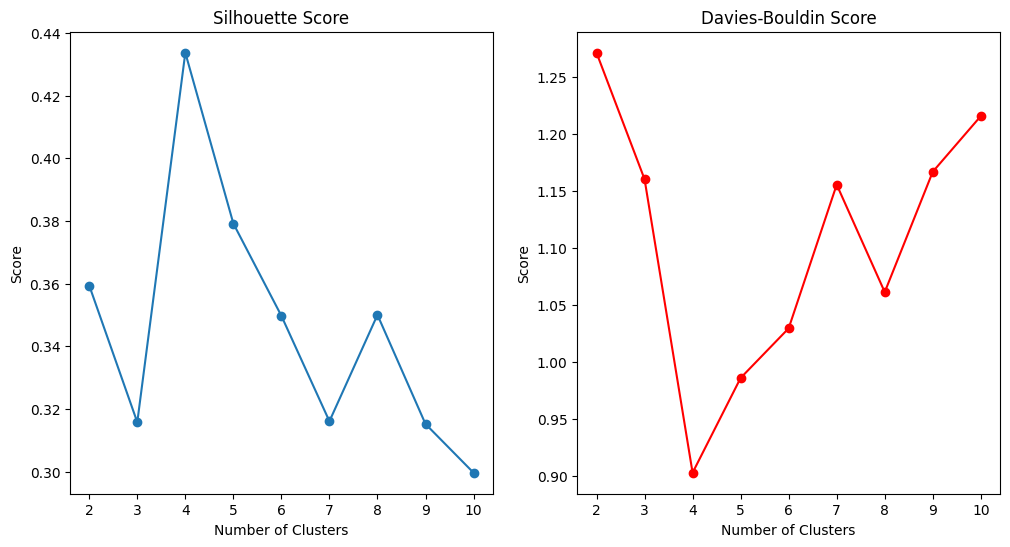

In [64]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

ax[0].plot(range(2, 11), silhouette_scores, marker='o')
ax[0].set_title("Silhouette Score")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Score")

ax[1].plot(range(2, 11), davies_bouldin_scores, marker='o', color='red')
ax[1].set_title("Davies-Bouldin Score")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Score")

plt.show()

### **Insights:**
**Cluster Recommendation**
- Optimal Number of Clusters: Based on both metrics, the ideal number of clusters seems to be **4** :
  1. Silhouette Score is highest at **4**, indicating well-separated clusters.
  2. Davies-Bouldin Score is lowest at **4**, indicating clusters are compact and distinct.

**Conclusion:**
- Selecting **4** clusters for the analysis would likely yield the best clustering performance based on the analyzed scores from both metrics.

## 9.6) Evaluating the Final Model Based on optimal (K) value

In [66]:
# Train final model with best K
optimal_k = 4  # Change based on results
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm_cleaned["Cluster"] = kmeans_final.fit_predict(rfm_cleaned)


# Evaluate clustering
final_silhouette = silhouette_score(rfm_cleaned, rfm_cleaned["Cluster"])
print(f"Final Silhouette Score: {final_silhouette:.3f}")

Final Silhouette Score: 0.395


In [69]:
rfm_cleaned['Cluster'].value_counts()

,count
Cluster,
1,1580
0,1347
2,841
3,570


# Insigts:
- **Dominance of Cluster 1:**
Cluster 1 has the highest number of observations, accounting for approximately 36.4% of all data points. This cluster may represent a significant segment of your dataset.
- **Balanced Distribution:**
Clusters 0 and 2 have a relatively balanced representation, comprising around 31.1% and 19.4%, respectively.
- Cluster 3 has the least representation at 13.1%, indicating it might be less significant in the context of the dataset.


## 9.7) **Labeling & Interpret Customer Segments**


In [73]:
cluster_summary=rfm_cleaned.groupby('Cluster').mean().reset_index()
cluster_labels = {
    0: "High-Value Customers",
    1: "Regular Customers",
    2: "Churn Risk",
    3: "Low-Spending Customers"
}
cluster_summary["Segment"] = cluster_summary["Cluster"].map(cluster_labels)

print(cluster_summary)

   Cluster   Recency  Frequency  Monetary                 Segment
0        0  4.518671   3.092860  5.908592    High-Value Customers
1        1  3.709563   4.195108  6.952276       Regular Customers
2        2  1.560640   4.080577  6.825900              Churn Risk
3        3  4.813296   1.857576  4.917107  Low-Spending Customers


###  **Cluster Analysis Insights:**
- **Cluster 0:**
  * High-Value Customers:
    1. Likely to be recent purchasers.
    2. Moderate frequency of purchases.
    3. Above-average monetary spending.
- **Cluster 1:**
  * Regular Customers:
    1. Recent activity with a decent
       purchasing frequency.
    2. High monetary spending compared
       to the average customer.
- **Cluster 2:**
  * Churn Risk:
    1. Recent purchasing, but could
       indicate a risk as frequency is not low.
    2. High monetary value presents a
       concern if retention strategies are not applied.
- **Cluster 3:**
  * Low-Spending Customers:
    1. Less recent activity and low
       purchase frequency.
    2. Overall low spending indicates a
       need for engagement strategies.

- **Engagement Strategies:**
    1. High-Value and Regular          
       Customers:Retaining these customers with loyalty programs and personalized marketing will be crucial.
    2. Churn Risk: Implementing targeted
       re-engagement campaigns to encourage repeat purchases and mitigate churn.
    3. Low-Spending Customers: Considering
       strategies to increase engagement and spending, possibly through promotions or incentives for these customers will be recommended.

# 10.)  **Customer Churn Analysis**

In [74]:
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Sales,Month,Weekday,Quarter,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2,4,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,4,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2,4,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,4,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2,4,8


In [75]:
# Create a Basket matrix for association rule mining
customer_last_purchase=df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head()

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [76]:
# customer with highest RFM score
rfm.sort_values(by='RFM_score',ascending=False)

,Recency,Frequency,Monetary,R_segment,F_segment,M_segment,RFM_score,Segment,Cluster
CustomerID,,,,,,,,,
18102.0,0,431,259657,4,4,4,12,Best Customers,3
14367.0,7,524,9261,4,4,4,12,Best Customers,0
17625.0,17,315,2047,4,4,4,12,Best Customers,0
15484.0,0,188,3594,4,4,4,12,Best Customers,0
14395.0,1,350,3507,4,4,4,12,Best Customers,0
...,...,...,...,...,...,...,...,...,...
13133.0,273,7,109,1,1,1,3,Need Attention,2
15578.0,161,13,127,1,1,1,3,Need Attention,2
13144.0,332,3,110,1,1,1,3,Need Attention,2


In [77]:
refrence_date

Timestamp('2011-12-09 12:50:00')

In [78]:
customer_last_purchase=(refrence_date - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,325
12347.0,1
12348.0,74
12349.0,18
12350.0,309


## 10.1)  Defining Customer Threshold

In [79]:
# Define churn Threshold (e.g 90 Days without purchase)
churn_threshold=90
churn_customers=customer_last_purchase[customer_last_purchase>churn_threshold]
churn_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,325
12350.0,309
12353.0,203
12354.0,231
12355.0,213


## 10.2)  **Plotting the Churned Customers**

Number of Churned Customers: 1445


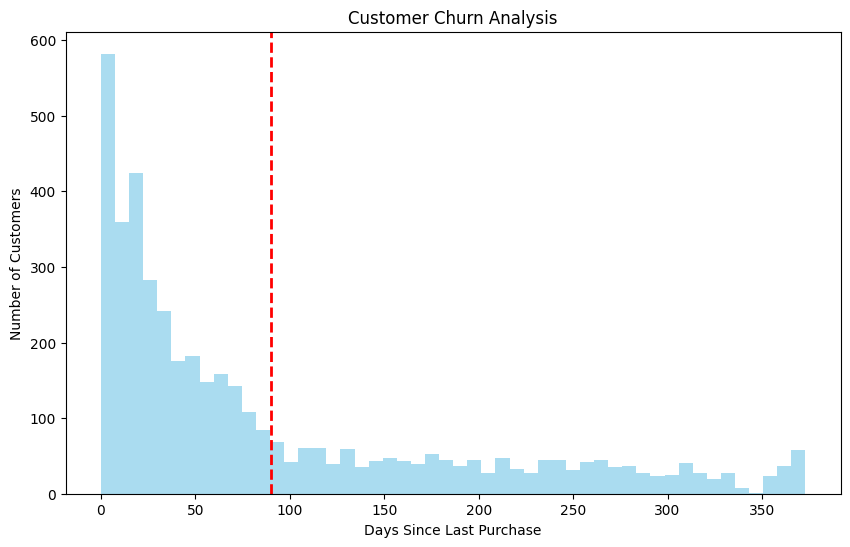

In [80]:
print("Number of Churned Customers:",len(churn_customers))
plt.figure(figsize=(10,6))
plt.hist(customer_last_purchase,bins=50,color='skyblue',alpha=0.7)
plt.axvline(x=churn_threshold,color='red',linestyle='dashed',linewidth=2)
plt.title("Customer Churn Analysis")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.show()

# 11.) **Predicting Customer Churn(Classification)**

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [81]:
# Define target: Churn (1 if no purchase in last 6 months)
df4['Churn']=(df4['InvoiceDate'].max()-df4['InvoiceDate']).dt.days > 180

In [83]:
# Selecting Features
X=rfm[['Recency','Frequency','Monetary']]
y=df4.groupby('CustomerID')['Churn'].first()

# Train-Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# train Model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

# Make Predictions
y_pred=model.predict(X_test)

# Evaluate the Model
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       False       0.66      0.66      0.66       276
        True       0.84      0.84      0.84       592

    accuracy                           0.78       868
   macro avg       0.75      0.75      0.75       868
weighted avg       0.78      0.78      0.78       868



## **Insights:**
- The model performs well in  
  identifying true instances, achieving high precision, recall, and F1-score, indicating a good balance between precision and recall.
- The model's performance on false
  instances is comparatively lower, suggesting there might be challenges in correctly identifying these cases.
- The model has a relatively good
  accuracy of 78%, indicating that a significant majority of predictions are correct.
  
**Key Observations:**
-  There is a notable disparity in
   performance between the true and false classes. While the model excels in identifying true cases, it struggles more with false cases.
-  The overall accuracy is driven by  
   the larger number of true instances compared to false ones, which can lead to a misleading impression of model performance if not interpreted carefully.